1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [27]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import optimize
import pickle
import scipy

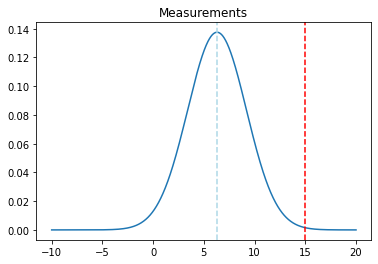

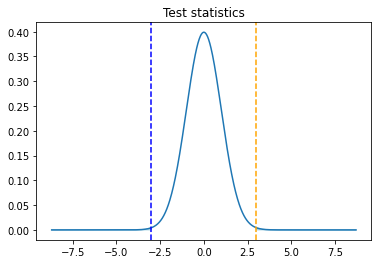

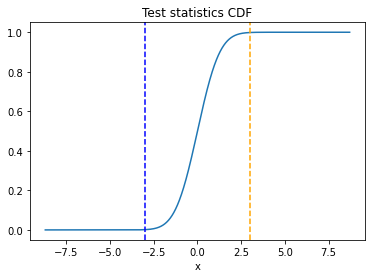

p-value = 0.0026997960632601965


In [18]:
x0 = 15
mu = 6.3
Z = 3
sigma = (x0-mu)/Z
w = x0-mu

x = np.linspace(-10 ,20, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.figure()
plt.plot(x,y)
plt.title("Measurements")
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')

# Plot statistics
xs = np.linspace(-(x0-mu), +(x0-mu), 1000)
ts = scipy.stats.norm.pdf(xs)
plt.figure()
plt.plot(xs, ts)
plt.title("Test statistics")
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')

#in CDF
cs = scipy.stats.norm.cdf(xs)
plt.figure()
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)
#Since the probability is small we reject the null hypothesis

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T test:  -3.786997938137629


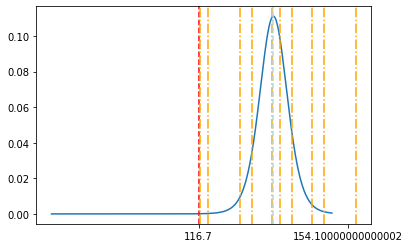

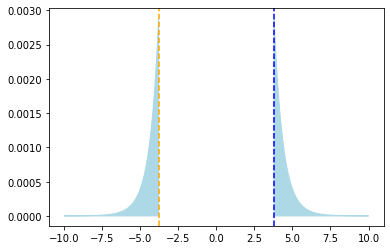

p-value = 0.004302464132864604


In [52]:
from math import sqrt

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100]) #blood pressure pre-exposure
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135]) #blood pressure post-exposure

sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_pre**2 + sigma_post**2 )/ 2)
x1 = np.mean(pre) #sample mean
x2 = np.mean(post) #mu
n = len(pre)
sigma = np.sqrt((sigma_pre**2 + sigma_post**2) / 2)
w = x1 - x2
T = (w) / (sigma*np.sqrt(2/n))
print('T test: ', T)

# Plot the data
x = np.linspace(80,150,1000)
y = stats.t.pdf(x, loc=x2, scale=sigma / np.sqrt(len(pre)), df=len(pre) - 1)
plt.plot(x, y)
plt.axvline(x1, linestyle='--', color='red')
plt.xticks([x2 - w, x2 + w], [x2 - w, x2 + w])
for l in post:
    plt.axvline(l, linestyle='-.', color='orange')
plt.axvline(x2, linestyle='--', color='lightblue')
plt.show()

# Plot the test statistics 
plt.figure()
xs = np.linspace(-10, 10, 1000)
ts = stats.t.pdf(xs, n-1)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
#Since p-value is smaller than alpha(=0.005), we reject the null hypotesis

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

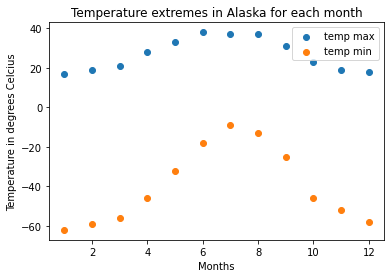

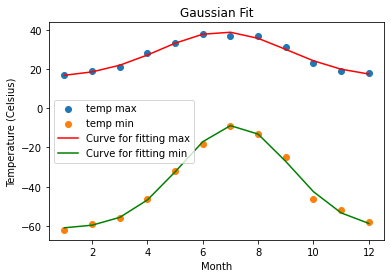

In [23]:
t_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]) #min temp
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]) #max temp
time = np.linspace(1,12,12) #months

plt.figure()
plt.title('Temperature extremes in Alaska for each month')
plt.scatter(time,t_max,label='temp max')
plt.scatter(time,t_min,label='temp min')
plt.xlabel('Months')
plt.ylabel('Temperature in degrees Celcius')
plt.legend()
plt.show()

def f_fit(x, A, mean, sigma, o): # gaussian
    return A * np.exp(-(x - mean) ** 2 / (2 * sigma ** 2)) + o

opt_max, cov_max = optimize.curve_fit(f_fit, time, t_max)
opt_min, cov_min = optimize.curve_fit(f_fit, time,  t_min)

plt.scatter(time,t_max, label='temp max')
plt.scatter(time,t_min, label='temp min')
plt.plot(time, f_fit(time, opt_max[0], opt_max[1], opt_max[2], opt_max[3]), color = 'red', label= 'Curve for fitting max')
plt.plot(time, f_fit(time, opt_min[0], opt_min[1], opt_min[2], opt_min[3]), color = 'green', label= 'Curve for fitting min')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Gaussian Fit')
plt.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

chi2= 5082.905956455061
pvalue= 0.0


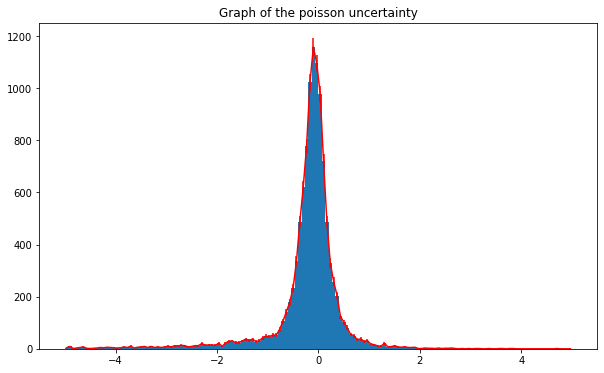

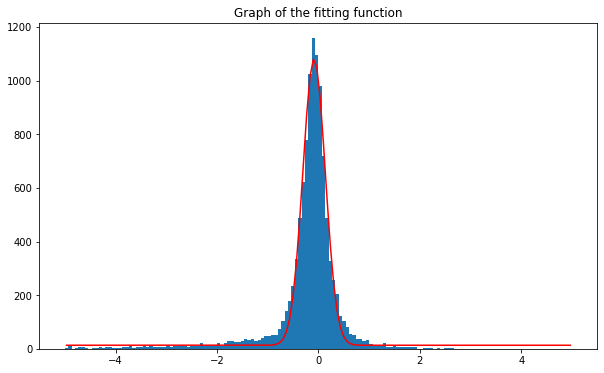

In [35]:
#Load data
infile = open("./data/residuals_261.pkl", "rb")
my_dict = pickle.load(infile)
infile.close()

dataset = pd.DataFrame(my_dict.tolist())
residuals=dataset["residuals"]
distances=dataset["distances"]

#Plot the data
fig,ax1 = plt.subplots(figsize = (10,6))
h,bins,_ = ax1.hist(residuals, bins = 150, range = (-5,5))
bin_center = (bins[:-1] + bins[1:])/2
sigma= np.sqrt(abs(h))
ax1.set_title("Graph of the poisson uncertainty")
ax1.errorbar(x = bin_center, y = h, yerr = sigma, color = "red")

#Plot the fitting
fig,ax2 = plt.subplots(figsize = (10,6))
m, std_dev = stats.norm.fit(residuals)
opt,cov = scipy.optimize.curve_fit(f_fit,bin_center, h, p0 = [max(residuals),m,std_dev,0])
ax2.set_title("Graph of the fitting function")
ax2.hist(residuals,bins = 150, range = (-5,5))
ax2.plot(bin_center, f_fit(bin_center, *opt), color ="red")

#Perform the test
value = tuple(opt)
fit = f_fit(bin_centr, *opt)
chi2 = np.sum(((h - fit)**2) / std_dev**2)
print("chi2=",chi2)
pvalue = 1. - scipy.stats.chi2.cdf(chi2,len(bin_center) - 1 )
print("pvalue=",pvalue)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [37]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

Best-fit values of the parameters: 
 a = -9.988133689134516  b =  12.333023014196588  c =  9.38411486809072


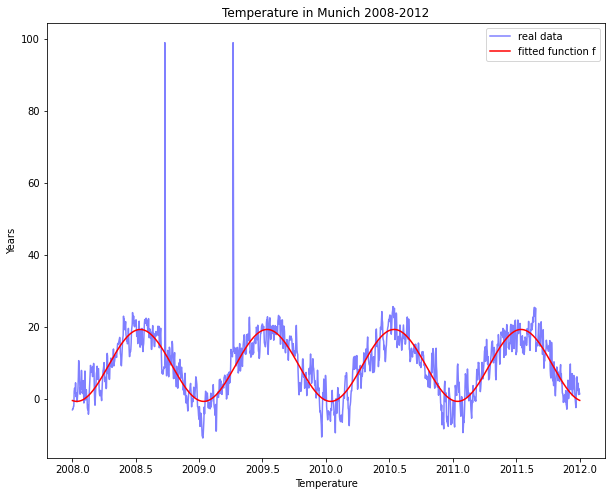

In [41]:
#Load data
dataset = pd.read_csv('munich_temperatures_average_with_bad_data.txt',names=['Time','Temperature'], delimiter=" ")
df = dataset[dataset['Time'] >= 2008]
df = df[df['Time'] <= 2012]
temps = df['Temperature']
time = df['Time']

def f(t,a,b,c):   
    return a * np.cos(2 * np.pi * t + b) + c

opt, cov = optimize.curve_fit(f, time, temps)
# Plot the data
print("Best-fit values of the parameters: \n" , 'a =' , opt[0] , ' b = ' , opt[1], ' c = ' , opt[2])
plt.figure(figsize=(10,8))
plt.plot(time, temps, alpha = 0.5, color='blue', label = 'real data')
plt.plot(time, f(time, opt[0], opt[1], opt[2]), color='red', label='fitted function f')
plt.title('Temperature in Munich 2008-2012')
plt.xlabel('Temperature')
plt.ylabel('Years')
plt.legend()
plt.show()

In [43]:
# Analyze the data
f_fit = f(time, opt[0], opt[1], opt[2])

print('Overall average temperature in Munich predicted by the model', np.mean(f_fit))
print('Hottest time of year prediction', np.max(f_fit))
print('Coldest time of year prediction', np.min(f_fit))

#The b parameter is the phase shift of the cosine function. 
#It determines the t value i.e,the time of year when the temperature is minimum or maximu

Overall average temperature in Munich predicted by the model 9.384097733283326
Hottest time of year prediction 19.372195568442635
Coldest time of year prediction -0.6037388871173217


Best-fit values of the parameters: 
 a = -9.982183881231062 b =  1.0014440576722103 c =  -5.9047271750555055 d =  9.398124918050614


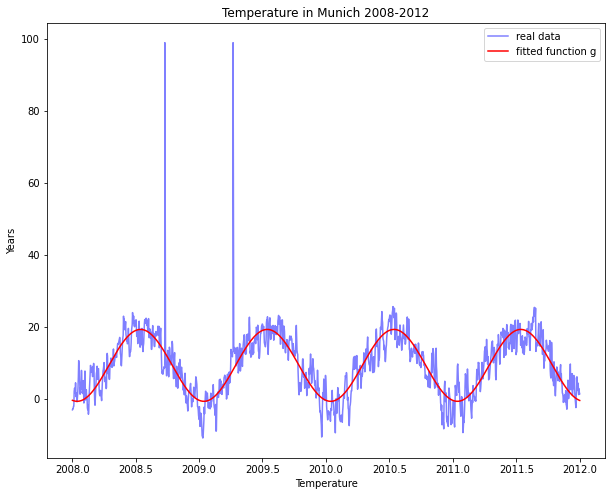

RSS f(t) = 34359.85859996652
RSS g(t)= 34352.794053704085 

p-value: 0.584 , additional parameter necessary: NO


In [44]:
# Fitting with the g(x)
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d

opt_g, cov = optimize.curve_fit(g, time, temps)
print("Best-fit values of the parameters: \n" , 'a =' , opt_g[0] , 'b = ' , opt_g[1], 'c = ' , opt_g[2], 'd = ', opt_g[3])

plt.figure(figsize=(10,8))
plt.plot(time, temps, alpha=0.5, color='blue', label='real data')
plt.plot(time, g(time, *opt_g), color='red', label='fitted function g')
plt.title('Temperature in Munich 2008-2012')
plt.xlabel('Temperature')
plt.ylabel('Years')
plt.legend()
plt.show()

# Comptuing Fisher F-test
alpha = 0.05

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    else: print('P-Value: ', pvalue)
    return

ssr_f = np.sum((temps - f(time,*opt))**2)
ssr_g = np.sum((temps - g(time,*opt_g))**2)
print('RSS f(t) =', ssr_f)
print('RSS g(t)=', ssr_g,'\n')

Ftest(ssr_f, ssr_g, len(opt), len(opt_g), len(df), verbose=True)